## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read Dataset

In [2]:
df = pd.read_csv('D:\\Study\\Data-Science\\Machine Learning\\Practice\\dataset\\height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


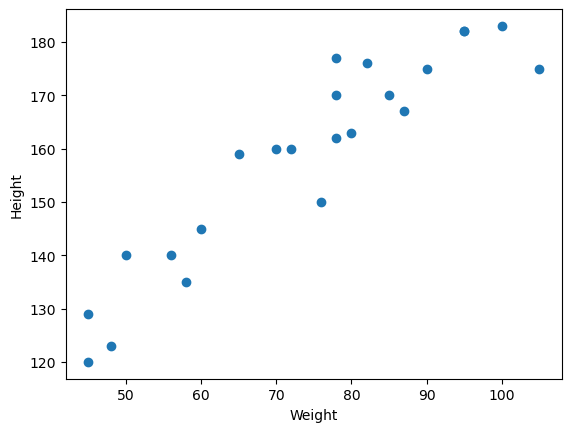

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

### EDA, FE

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [6]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [7]:
df.isna().sum()

Weight    0
Height    0
dtype: int64

### Devide Dataset into independent and dependent feature

In [8]:
X = df[['Weight']] # independent feature
y = df['Height'] # dependent feature

In [9]:
X.shape,y.shape

((23, 1), (23,))

### Further devide the dataset into train dataset and test dataset
For this we need train_test_split object from sklearn

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [13]:
y_train.shape,y_test.shape

((18,), (5,))

### Scaling X dataset (indpendent)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

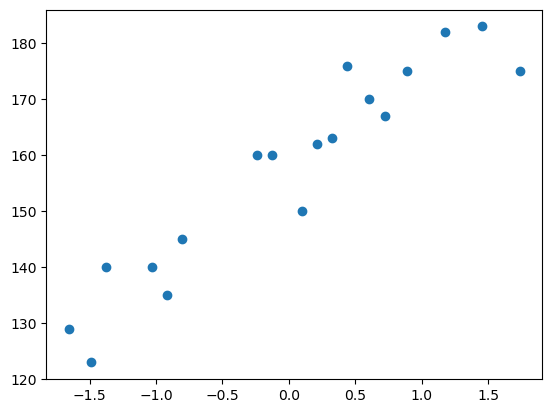

In [18]:
plt.scatter(X_train,y_train)

We can see that our X_train data has been scaled to -2 to 2 range

### Model training with Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train,y_train)

LinearRegression()

In [22]:
model.coef_ # slope

array([17.03440872])

In [23]:
model.intercept_ # intercept

157.5

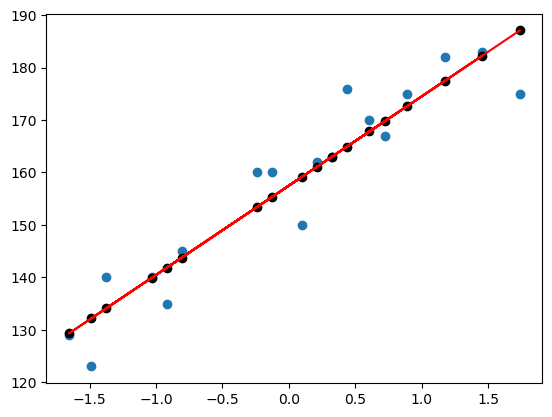

In [24]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,model.predict(X_train),color='black')
plt.plot(X_train,model.predict(X_train),'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [25]:
y_pred_test = model.predict(X_test)

In [26]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [27]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

## Performance Metrics MAE,MSE,RMSE

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

print('MSE: ',mse)
print('MAE: ',mae)
print('RMSE: ',rmse)

MSE:  109.77592599051664
MAE:  9.822657814519232
RMSE:  10.477400726827081


1. **MSE (Mean Squared Error)**: 

   - MSE is a measure of the average squared difference between the actual (observed) values and the predicted values in a regression problem.
   - It quantifies how far off the model's predictions are from the actual values.
   - Larger MSE values indicate that the model's predictions are less accurate, as it means there are larger errors in the predictions.
   - The MSE value is not directly interpretable in the units of the target variable because it's squared.

   In your case, a MSE value of approximately 109.78 suggests that, on average, the squared difference between your model's predictions and the actual values is around 109.78.

2. **MAE (Mean Absolute Error)**:

   - MAE measures the average absolute difference between the actual values and the predicted values in a regression problem.
   - It provides a more straightforward and interpretable measure of the model's error compared to MSE.
   - Smaller MAE values indicate that the model's predictions are closer to the actual values.

   In your case, a MAE value of approximately 9.82 suggests that, on average, the absolute difference between your model's predictions and the actual values is around 9.82.

3. **RMSE (Root Mean Squared Error)**:

   - RMSE is the square root of the MSE. It is often used because it's in the same units as the target variable, making it more interpretable.
   - RMSE penalizes larger errors more heavily than MAE because it takes the square root of the squared errors.

   In your case, an RMSE value of approximately 10.48 means that, on average, the predicted values deviate from the actual values by approximately 10.48 units.

These metrics are important for assessing the accuracy of your regression model. Lower MSE, MAE, and RMSE values indicate better model performance, as they suggest that your model's predictions are closer to the actual values. However, the choice of which metric to use may depend on the specific context of your problem and your preferences regarding the handling of different types of errors.

### Accuracy of the model R squared and Adjusted r ssquared
### R square
Formula

**R^2 = 1 - SSR/SST**


- R^2	=	Accuracy of the model
- SSR	=	sum of squares of residuals
- SST	=	total sum of squares

In [37]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_test)


In [38]:
r2

0.776986986042344

### Adjusted r square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-p-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- p: The number of predictor variables

In [39]:
n = len(y_test)  # Number of samples
p = X_test.shape[1]  # Number of predictor variables in your model (excluding the intercept)

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))


In [40]:
adjusted_r2

0.7026493147231252

In [41]:
print('R^2:',r2)
print('Adjusted R^2: ',adjusted_r2)

R^2: 0.776986986042344
Adjusted R^2:  0.7026493147231252


R-squared (R2) and adjusted R-squared (adjusted R2) scores. These metrics are used to evaluate the goodness of fit of a regression model, particularly in the context of linear regression. Here's an explanation of these values:

1. **R-squared (R2):**
   
   - R-squared is a measure that represents the proportion of the variance in the dependent variable (target) that is explained by the independent variables (predictors) in a regression model.
   - It ranges from 0 to 1, where:
     - R2 = 0 indicates that the model does not explain any of the variance in the target variable.
     - R2 = 1 indicates that the model explains all of the variance in the target variable.
   - In your case, an R2 value of approximately 0.777 means that your regression model explains about 77.7% of the variance in the target variable. This suggests that the model is doing a reasonably good job of capturing the underlying patterns in the data.

2. **Adjusted R-squared (adjusted R2):**

   - Adjusted R-squared is a modification of the R2 score that adjusts for the number of predictor variables (features) in the model.
   - It provides a more realistic assessment of model fit by penalizing the inclusion of irrelevant or redundant predictors.
   - Adjusted R2 takes into account the sample size (number of data points) and the number of predictors in the model.
   - It typically provides a lower value than R2 if the model includes unnecessary predictors.
   - In your case, an adjusted R2 value of approximately 0.703 suggests that, after adjusting for the number of predictors in the model, it still explains about 70.3% of the variance in the target variable. This indicates that the model is performing well, even when considering its complexity.

In summary, your model has an R2 value of approximately 0.777, indicating that it explains a substantial portion of the variance in the target variable. The adjusted R2 value of approximately 0.703 confirms the model's performance while adjusting for the number of predictors, suggesting that the model's explanatory power is robust even after accounting for model complexity. These are positive signs of a well-fitting regression model.

# Completed!!!